# PaddleDetection快速上手

本项目以路标数据集roadsign为例，详细说明了如何使用PaddleDetection训练一个目标检测模型，并对模型进行评估和预测。

本项目的路标数据集roadsign提供了Pascal VOC格式和COCO格式两种格式。

本项目提供YOLOv3、FasterRCNN、FCOS这几个算法的配置文件。

您可以选择其中一个配置开始训练，快速体验PaddleDeteciton。

## 环境安装

### 1.  AiStudio环境设置

In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data49531


In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

hw_configs.zip	PaddleDetection.zip


In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, you need to use the persistence path as the following:
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 122kB 8.5MB/s eta 0:00:01


In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可:
# Also add the following code, so that every time the environment (kernel) starts, just run the following code:
import sys
sys.path.append('/home/aistudio/external-libraries')


### 2. 安装Paddle

AIStudio上已经安装好PaddlePaddle 1.8.4。

In [ ]:
import paddle
print(paddle.__version__)

1.8.4


### 3. 克隆PaddleDetection

通过以下命令克隆最新的PaddleDetection代码库。

```
! git clone https://github.com/PaddlePaddle/PaddleDetection
````


如果因为网络问题clone较慢，可以： 

- 1. 通过github加速通道clone

  ```
  git clone https://hub.fastgit.org/PaddlePaddle/PaddleDetection.git
  ```


- 2. 选择使用码云上的托管

  ```
  git clone https://gitee.com/paddlepaddle/PaddleDetection
  ```

  注：码云托管代码可能无法实时同步本github项目更新，存在3~5天延时，请优先从github上克隆。

- 3. 使用本项目提供的代码库，存放路径`work/PaddleDetection.zip`

这里采用项目提供的代码库

In [ ]:
! ls ~/work/PaddleDetection.zip

/home/aistudio/work/PaddleDetection.zip


In [ ]:
%cd ~/work/
! unzip -o PaddleDetection.zip

/home/aistudio/work
Archive:  PaddleDetection.zip
   creating: PaddleDetection/
  inflating: PaddleDetection/.pre-commit-config.yaml  
   creating: PaddleDetection/.git/
  inflating: PaddleDetection/.git/index  
  inflating: PaddleDetection/.git/packed-refs  
  inflating: PaddleDetection/.git/config  
   creating: PaddleDetection/.git/logs/
  inflating: PaddleDetection/.git/logs/HEAD  
   creating: PaddleDetection/.git/logs/refs/
   creating: PaddleDetection/.git/logs/refs/heads/
   creating: PaddleDetection/.git/logs/refs/heads/release/
  inflating: PaddleDetection/.git/logs/refs/heads/release/0.4  
   creating: PaddleDetection/.git/logs/refs/remotes/
   creating: PaddleDetection/.git/logs/refs/remotes/origin/
  inflating: PaddleDetection/.git/logs/refs/remotes/origin/HEAD  
   creating: PaddleDetection/.git/hooks/
  inflating: PaddleDetection/.git/hooks/pre-rebase.sample  
  inflating: PaddleDetection/.git/hooks/applypatch-msg.sample  
  inflating: PaddleDetection/.git/hooks/prepare-

### 4. PaddleDetection依赖安装及设置

通过如下方式安装PaddleDetection依赖，并设置环境变量

安装cocoapi

如果因为网络问题clone较慢，可以:

1. 通过github加速通道clone

```
pip install "git+https://hub.fastgit.org/cocodataset/cocoapi.git#subdirectory=PythonAPI"
```

In [ ]:
# github
#! pip install "git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI"

# fast github
! pip install "git+https://hub.fastgit.org/cocodataset/cocoapi.git#subdirectory=PythonAPI"

Looking in indexes: https://mirror.baidu.com/pypi/simple/
  Cloning https://hub.fastgit.org/cocodataset/cocoapi.git to /tmp/pip-req-build-eknp7llv
  Running command git clone -q https://hub.fastgit.org/cocodataset/cocoapi.git /tmp/pip-req-build-eknp7llv
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=278293 sha256=6d4a86b6452e5c00acf5057f3d7d960a3dffc4d5734f9d38392f4b5d2388d33e
  Stored in directory: /tmp/pip-ephem-wheel-cache-mxhtemvb/wheels/50/23/e1/89f9501b4abaf8940a8a11321fa2f9bc225ecf3ee98be5de08
Successfully built pycocotools


设置环境

In [ ]:
%cd ~/work/PaddleDetection/
!pip install -r requirements.txt

%env PYTHONPATH=.:$PYTHONPATH
%env CUDA_VISIBLE_DEVICES=0

/home/aistudio/work/PaddleDetection
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 1.0MB 19.1MB/s eta 0:00:01
env: PYTHONPATH=.:$PYTHONPATH
env: CUDA_VISIBLE_DEVICES=0


验证安装

In [ ]:
! python ppdet/modeling/tests/test_architectures.py

ss/home/aistudio/work/PaddleDetection/ppdet/core/workspace.py:117: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  isinstance(merge_dct[k], collections.Mapping)):
..........
----------------------------------------------------------------------
Ran 12 tests in 3.043s

OK (skipped=2)


使用COCO上的MobileNetv3-YOLOv3模型预测验证:

In [ ]:
!python tools/infer.py -c configs/yolov3_mobilenet_v3.yml -o weights=https://paddlemodels.bj.bcebos.com/object_detection/yolov3_mobilenet_v3.pdparams --infer_img=demo/000000014439.jpg --draw_threshold 0.2

W0921 15:36:55.233458   258 device_context.cc:252] Please NOTE: device: 0, CUDA Capability: 70, Driver API Version: 10.1, Runtime API Version: 9.0
W0921 15:36:55.238379   258 device_context.cc:260] device: 0, cuDNN Version: 7.6.
2020-09-21 15:36:58,303-INFO: Downloading yolov3_mobilenet_v3.pdparams from https://paddlemodels.bj.bcebos.com/object_detection/yolov3_mobilenet_v3.pdparams
100%|███████████████████████████████████| 92400/92400 [00:10<00:00, 8938.64KB/s]
2020-09-21 15:37:09,218-INFO: Not found annotation file annotations/instances_val2017.json, load coco17 categories.
2020-09-21 15:37:09,679-INFO: Infer iter 0
2020-09-21 15:37:09,745-INFO: Detection bbox results save in output/000000014439.jpg


## 准备数据

本项目使用[road-sign-detection](https://www.kaggle.com/andrewmvd/road-sign-detection) 比赛数据。

| 类别数 | 训练集 | 测试集  |
| ----- | ------ | ------ |
| 4     | 701     | 176   |

划分成训练集和测试集，总共877张图，其中训练集701张图、测试集176张图。
4个类别：
* speedlimit
* crosswalk
* trafficlight
* stop



本项目提供Pascal VOC格式和COCO格式的数据：

1. Pascal VOC格式：

	- 划分好的数据下载地址为： [roadsign_voc.tar](https://paddlemodels.bj.bcebos.com/object_detection/roadsign_voc.tar)。

	- AiStudio上数据地址：[roadsign_voc](https://aistudio.baidu.com/aistudio/datasetdetail/49531)

2. COCO格式：

	- 划分好的数据下载地址为：：[roadsign_coco.tar](https://paddlemodels.bj.bcebos.com/object_detection/roadsign_coco.tar)。

	- AiStudio上数据地址：[roadsign_coco](https://aistudio.baidu.com/aistudio/datasetdetail/52968)


将`~/data/`文件夹下的数据解压到`PaddleDetection/dataset/`文件夹下。

In [ ]:
%cd ~/work/PaddleDetection/dataset/
! pwd
! ls ~/data -l

/home/aistudio/work/PaddleDetection/dataset
/home/aistudio/work/PaddleDetection/dataset
total 8
drwxrwxrwx 2 root root 4096 Sep 21 15:22 data49531
drwxrwxrwx 2 root root 4096 Sep 21 15:24 data52968


#### 1. Pascal VOC格式数介绍


VOC数据格式的目标检测数据，是指每个图像文件对应一个同名的xml文件，xml文件中标记物体框的坐标和类别等信息。

Pascal VOC比赛对目标检测任务，对目标物体是否遮挡、是否被截断、是否是难检测物体进行了标注。对于用户自定义数据可根据实际情况对这些字段进行标注。

```
├── annotations
│   ├── road0.xml
│   ├── road100.xml
│    ...
├── images
│   ├── road0.png
│   ├── road100.png
│    ...
├── label_list.txt
├── train.txt
└── valid.txt
```

label_list.txt:
```
speedlimit
crosswalk
trafficlight
stop
```

train.txt/valid.txt:
```
./images/road839.png ./annotations/road839.xml
./images/road363.png ./annotations/road363.xml
./images/road148.png ./annotations/road148.xml
...
```

xml文件中包含以下字段：

* filename，表示图像名称。
   ```
   <filename>road650.png</filename>
   ```

* size，表示图像尺寸。包括：图像宽度、图像高度、图像深度
  ```
  <size>
	<width>300</width>
	<height>400</height>
	<depth>3</depth>
  </size>
  ```
* object字段，表示每个物体。包括
	
	* `name`: 目标物体类别名称
    * `pose`: 关于目标物体姿态描述（非必须字段）
    * `truncated`: 目标物体目标因为各种原因被截断（非必须字段）
    * `occluded`:  目标物体是否被遮挡（非必须字段）
    * `difficult`: 目标物体是否是很难识别（非必须字段）
    * `bndbox`: 物体位置坐标，用左上角坐标和右下角坐标表示：`xmin`、`ymin`、`xmax`、`ymax`


将`~/data/data49531/roadsign_voc.tar`解压到`PaddleDetection/dataset/roadsign_voc`下

In [ ]:
%cd ~/work/PaddleDetection/dataset/roadsign_voc/
! pwd

/home/aistudio/work/PaddleDetection/dataset/roadsign_voc
/home/aistudio/work/PaddleDetection/dataset/roadsign_voc


In [ ]:
# copy roadsign_voc.tar and extract
! cp ~/data/data49531/roadsign_voc.tar .
! tar -xvf roadsign_voc.tar
! rm -rf roadsign_voc.tar

In [ ]:
# 查看一条数据
! cat ./annotations/road650.xml


<annotation>
    <folder>images</folder>
    <filename>road650.png</filename>
    <size>
        <width>300</width>
        <height>400</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>speedlimit</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>126</xmin>
            <ymin>110</ymin>
            <xmax>162</xmax>
            <ymax>147</ymax>
        </bndbox>
    </object>
</annotation>

#### 2.  COCO格式数介绍

COCO数据格式，是指将所有训练图像的标注都存放到一个json文件中。数据以字典嵌套的形式存放。

```
annotations/
├── train.json
└── valid.json
images/
├── road0.png
├── road100.png
```

json文件中存放了 `info licenses images annotations categories`的信息:

* info: 存放标注文件标注时间、版本等信息。
* licenses: 存放数据许可信息。
* images: 存放一个**list**，存放所有图像的图像名，下载地址，图像宽度，图像高度，图像在数据集中的id等信息。
* annotations: 存放一个**list**，存放所有图像的所有物体区域的标注信息，每个目标物体标注以下信息：
    
    ```
    {
    	'area': 899, 
    	'iscrowd': 0, 
        'image_id': 839, 
        'bbox': [114, 126, 31, 29], 
        'category_id': 0, 'id': 1, 
        'ignore': 0, 
        'segmentation': []
    }
    ```

将`~/data/data49531/roadsign_coco.tar`解压到`PaddleDetection/dataset/roadsign_coco`下

In [ ]:
%cd ~/work/PaddleDetection/dataset/
! mkdir roadsign_coco
%cd ~/work/PaddleDetection/dataset/roadsign_coco/
! pwd

/home/aistudio/work/PaddleDetection/dataset
/home/aistudio/work/PaddleDetection/dataset/roadsign_coco
/home/aistudio/work/PaddleDetection/dataset/roadsign_coco


In [ ]:
# copy roadsign_coco.tar and extract
! cp ~/data/data52968/roadsign_coco.tar .
! tar -xvf roadsign_coco.tar
! rm -rf roadsign_coco.tar

./annotations/
./annotations/train.json
./annotations/valid.json
./images/
./images/road749.png
./images/road355.png
./images/road768.png
./images/road299.png
./images/road104.png
./images/road592.png
./images/road617.png
./images/road318.png
./images/road515.png
./images/road40.png
./images/road481.png
./images/road255.png
./images/road876.png
./images/road148.png
./images/road153.png
./images/road242.png
./images/road87.png
./images/road284.png
./images/road52.png
./images/road254.png
./images/road360.png
./images/road47.png
./images/road645.png
./images/road815.png
./images/road694.png
./images/road831.png
./images/road844.png
./images/road132.png
./images/road584.png
./images/road398.png
./images/road204.png
./images/road212.png
./images/road714.png
./images/road588.png
./images/road399.png
./images/road99.png
./images/road480.png
./images/road763.png
./images/road483.png
./images/road22.png
./images/road745.png
./images/road187.png
./images/road246.png
./images/road705.png
./image

In [ ]:
# 查看一条数据
import json
coco_anno = json.load(open('./annotations/train.json'))

# coco_anno.keys
print('\nkeys:', coco_anno.keys())

# 查看类别信息
print('\n物体类别:', coco_anno['categories'])

# 查看一共多少张图
print('\n图像数量：', len(coco_anno['images']))

# 查看一共多少个目标物体
print('\n标注物体数量：', len(coco_anno['annotations']))

# 查看一条目标物体标注信息
print('\n查看一条目标物体标注信息：', coco_anno['annotations'][0])



keys: dict_keys(['images', 'type', 'annotations', 'categories'])

物体类别: [{'supercategory': 'none', 'id': 0, 'name': 'speedlimit'}, {'supercategory': 'none', 'id': 1, 'name': 'crosswalk'}, {'supercategory': 'none', 'id': 2, 'name': 'trafficlight'}, {'supercategory': 'none', 'id': 3, 'name': 'stop'}]

图像数量： 701

标注物体数量： 991

查看一条目标物体标注信息： {'area': 899, 'iscrowd': 0, 'image_id': 839, 'bbox': [114, 126, 31, 29], 'category_id': 0, 'id': 1, 'ignore': 0, 'segmentation': []}


## 开始训练
本项目在`work/hw_configs/`目录下提供以下配置文件

* yolov3_mobilenet_v1_roadsign_voc_template.yml
* yolov3_mobilenet_v1_roadsign_coco_template.yml
* ppyolo_resnet50_vd_roadsign_coco_template.yml
* faster_rcnn_r50_roadsign_coco_template.yml
* faster_rcnn_r50_vd_fpn_roadsign_coco_template.yml
* fcos_r50_roadsign_coco_template.yml

将`~/work/hw_configs.zip`解压到 `configs` 文件夹下

In [ ]:
%cd ~/work/PaddleDetection/

!unzip -o ~/work/hw_configs.zip -d configs/

! ls configs/hw_configs/

/home/aistudio/work/PaddleDetection
Archive:  /home/aistudio/work/hw_configs.zip
   creating: configs/hw_configs/
  inflating: configs/hw_configs/fcos_r50_roadsign_coco_template.yml  
   creating: configs/hw_configs/.ipynb_checkpoints/
  inflating: configs/hw_configs/faster_rcnn_r50_vd_fpn_roadsign_coco_template.yml  
  inflating: configs/hw_configs/yolov3_mobilenet_v1_roadsign_coco_template.yml  
  inflating: configs/hw_configs/faster_rcnn_r50_roadsign_coco_template.yml  
  inflating: configs/hw_configs/yolov3_mobilenet_v1_roadsign_voc_template.yml  
faster_rcnn_r50_roadsign_coco_template.yml
faster_rcnn_r50_vd_fpn_roadsign_coco_template.yml
fcos_r50_roadsign_coco_template.yml
yolov3_mobilenet_v1_roadsign_coco_template.yml
yolov3_mobilenet_v1_roadsign_voc_template.yml


In [ ]:
# 选择配置开始训练。可以通过 -o 选项覆盖配置文件中的参数
! python -u tools/train.py -c configs/hw_configs/faster_rcnn_r50_vd_fpn_roadsign_coco_template.yml -o use_gpu=true --eval


2020-09-21 15:51:22,535-INFO: If regularizer of a Parameter has been set by 'fluid.ParamAttr' or 'fluid.WeightNormParamAttr' already. The Regularization[L2Decay, regularization_coeff=0.000100] in Optimizer will not take effect, and it will only be applied to other Parameters!
2020-09-21 15:51:23,000-INFO: font search path ['/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf', '/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/afm', '/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
2020-09-21 15:51:23,411-INFO: generated new fontManager
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
2020-09-21 15:51:23,679-INFO: places would be ommited when DataLoader is not iterable
W0921 15:51:23.699156   350 device_context.cc:252] Please NOTE: device: 0, CUDA Capability: 70, Driver API Version: 10.1, Runtime API Version

您可以通过指定visualDL可视化工具，对loss变化曲线可视化。您仅需要指定 `use_vdl` 参数和 `vdl_log_dir` 参加即可。

点击左侧 **可视化** 按钮，设置 `logdir` 和模型文件，就可以对训练过程loss变化曲线和模型进行可视化。

In [25]:

! python -u tools/train.py -c configs/hw_configs/yolov3_mobilenet_v1_roadsign_voc_template.yml  \
                        -o use_gpu=true \
                        --use_vdl=true \
                        --vdl_log_dir=vdl_dir/scalar \
                        --eval


2020-09-21 15:54:56,290-INFO: If regularizer of a Parameter has been set by 'fluid.ParamAttr' or 'fluid.WeightNormParamAttr' already. The Regularization[L2Decay, regularization_coeff=0.000500] in Optimizer will not take effect, and it will only be applied to other Parameters!
2020-09-21 15:54:56,834-INFO: places would be ommited when DataLoader is not iterable
W0921 15:54:56.858466   429 device_context.cc:252] Please NOTE: device: 0, CUDA Capability: 70, Driver API Version: 10.1, Runtime API Version: 9.0
W0921 15:54:56.863382   429 device_context.cc:260] device: 0, cuDNN Version: 7.6.
2020-09-21 15:55:00,006-INFO: Downloading yolov3_mobilenet_v1.tar from https://paddlemodels.bj.bcebos.com/object_detection/yolov3_mobilenet_v1.tar
100%|██████████████████████████████████| 96380/96380 [00:01<00:00, 61189.23KB/s]
2020-09-21 15:55:01,872-INFO: Decompressing /home/aistudio/.cache/paddle/weights/yolov3_mobilenet_v1.tar...
2020-09-21 15:55:02,036-WARNING: /home/aistudio/.cache/paddle/weights/yo

## 评估和预测

PaddleDetection也提供了`tools/eval.py`脚本用于评估模型，评估是可以通过`-o weights=`指定待评估权重。

PaddleDetection训练过程中若开始了`--eval`，会将所有checkpoint中评估结果最好的checkpoint保存为`best_model.pdparams`，可以通过如下命令一键式评估最优checkpoint

这里我们加载预训练好的权重进行预测：

In [26]:
# 解压预先训练模型权重
#! tar -xvf ~/work/pre.tar

# 查看预训练模型权重文件

! ls ~/work/ -l

total 98116
-rw-r--r--  1 aistudio aistudio     25037 Sep 21 15:20 hw_configs.zip
drwxr-xr-x 15 aistudio aistudio      4096 Sep 21 15:55 PaddleDetection
-rw-r--r--  1 aistudio aistudio 100437562 Sep 21 15:20 PaddleDetection.zip


In [27]:
! python -u tools/eval.py -c configs/hw_configs/yolov3_mobilenet_v1_roadsign_voc_template.yml -o weights=

2020-09-21 16:01:22,008-INFO: places would be ommited when DataLoader is not iterable
W0921 16:01:22.035579   537 device_context.cc:252] Please NOTE: device: 0, CUDA Capability: 70, Driver API Version: 10.1, Runtime API Version: 9.0
W0921 16:01:22.040555   537 device_context.cc:260] device: 0, cuDNN Version: 7.6.
Traceback (most recent call last):
  File "tools/eval.py", line 180, in <module>
    main()
  File "tools/eval.py", line 141, in main
    checkpoint.load_params(exe, startup_prog, cfg.weights)
  File "/home/aistudio/work/PaddleDetection/ppdet/utils/checkpoint.py", line 114, in load_params
    if is_url(path):
  File "/home/aistudio/work/PaddleDetection/ppdet/utils/checkpoint.py", line 48, in is_url
    return path.startswith('http://') or path.startswith('https://')
AttributeError: 'NoneType' object has no attribute 'startswith'


PaddleDetection提供了tools/infer.py预测工具，可以使用训练好的模型预测图像并可视化，通过-o weights=指定加载训练过程中保存的权重。

预测脚本如下：

In [42]:
img_path = './dataset/roadsign_voc/images/road554.png'
! python tools/infer.py -c configs/hw_configs/yolov3_mobilenet_v1_roadsign_voc_template.yml --infer_img='./dataset/roadsign_voc/images/road554.png'

W0921 16:29:09.444197   850 device_context.cc:252] Please NOTE: device: 0, CUDA Capability: 70, Driver API Version: 10.1, Runtime API Version: 9.0
W0921 16:29:09.449137   850 device_context.cc:260] device: 0, cuDNN Version: 7.6.
2020-09-21 16:29:13,872-INFO: Load categories from dataset/roadsign_voc/label_list.txt
2020-09-21 16:29:14,080-INFO: Infer iter 0
2020-09-21 16:29:14,095-INFO: Detection bbox results save in output/road554.png


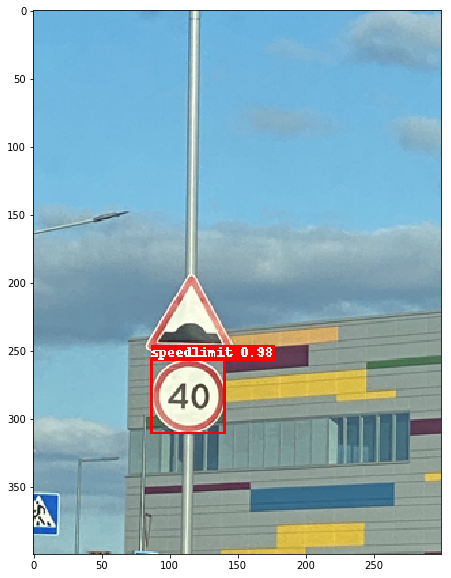

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt 
import cv2

infer_img = cv2.imread("output/road554.png")
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(infer_img, cv2.COLOR_BGR2RGB))
plt.show()

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 